# Test Fitness Funktionen
Teste die verschiedenen Fitness Funktionen und den Einfluss auf die Lösungen.

In [1]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35
[28 34]
[28 34]
[30 24]
[20 20]
[36 33]
[30 32]
[36 33]
[31 35]
[41 31]
[20 24]


## Random Fit mit 'konstanter' Fitness Funktion
Nutze Fitness Funktion die konstant den Wert 1 liefert.
Die Auswahl der Eltern hängt nicht von der Fitness ab, da jedes Chromosom die gleiche Wahrscheinlichkeit hat gewählt zu werden (Gleichverteilung).

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 3
Runtime: 0.9766218662261963
All time best 3


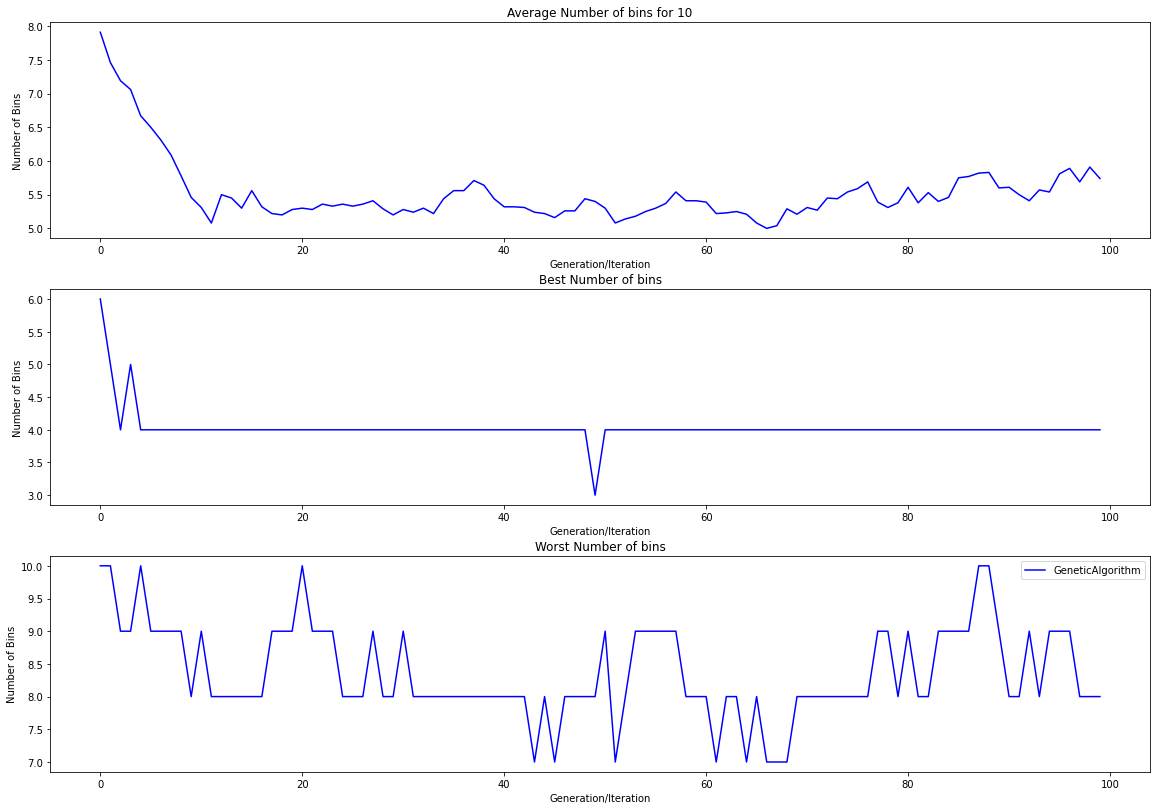

In [3]:
number_generations = 100 
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(small_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 59
Runtime: 19.91686701774597
All time best 58


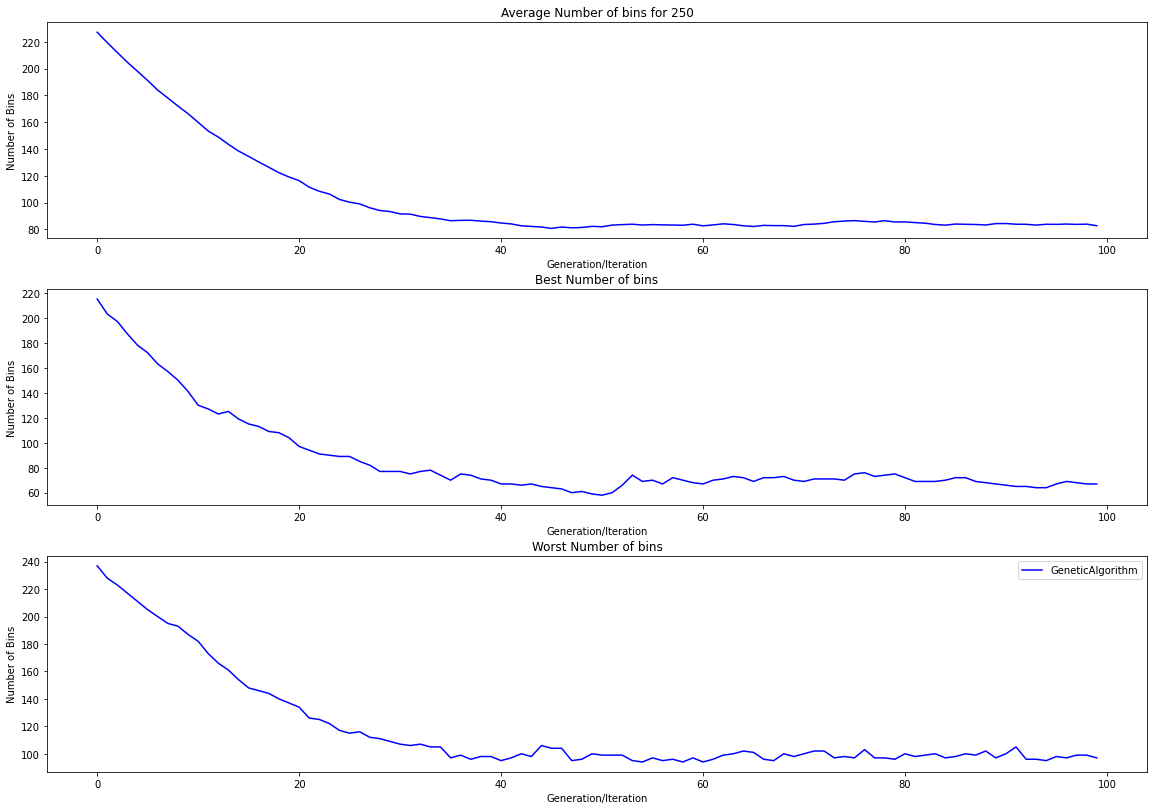

In [4]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(medium_objects, 100, medium_container[0], medium_container[1], 0.8, 0.05, number_generations,'constant', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(medium_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 132
Runtime: 44.785051107406616
All time best 128


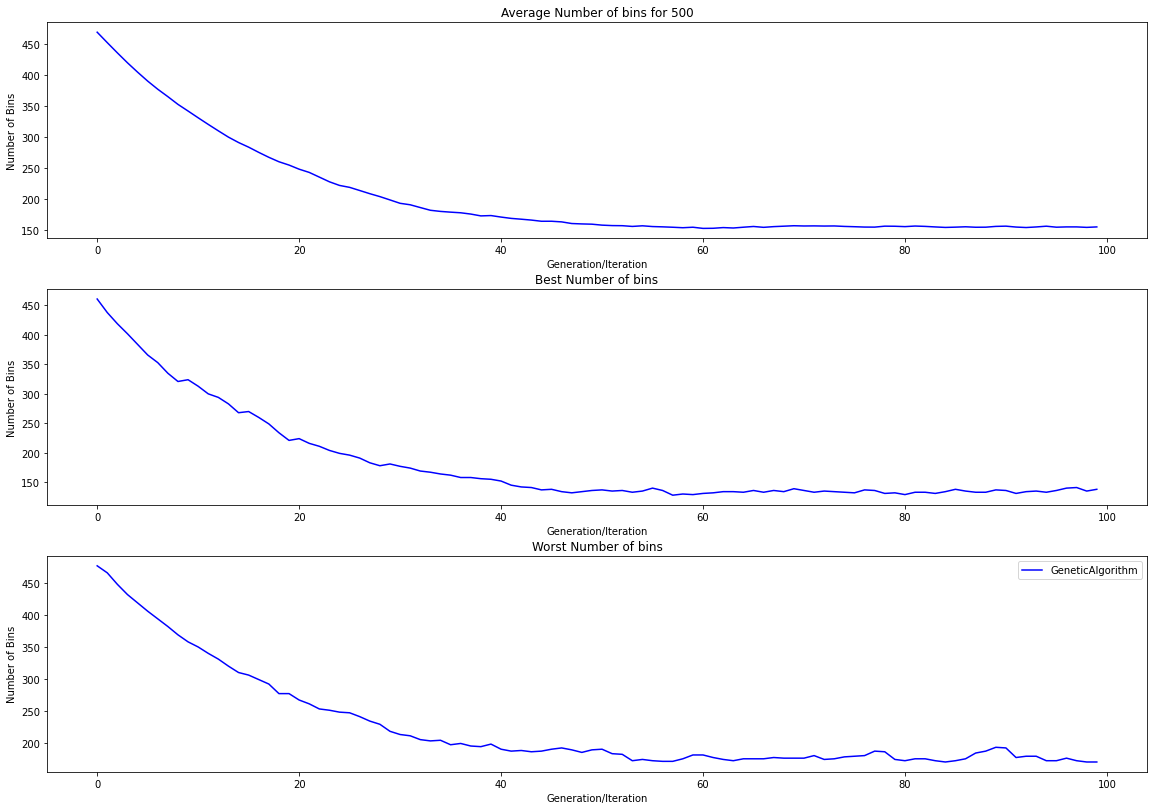

In [5]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(large_objects, 100, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(large_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## Random Fit mit 'amount bins' Fitness Funktion
Nutze die Fitness Funktion, die als Wert die Anzahl der verwendeten Bins des jeweiligen Chromosoms nutzt.
$\text{MaxAmountBins} +1 - \text{AmountBinsUsed}$, wobei die Anzahl der maximal verwendeten Bins der Anzahl der Objekte enspricht
Die Wahrscheinlichkeit, dass ein Elter ausgewählt wird steigt, desto weniger Bins benutzt werden.

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 4
Runtime: 0.8933250904083252
All time best 4


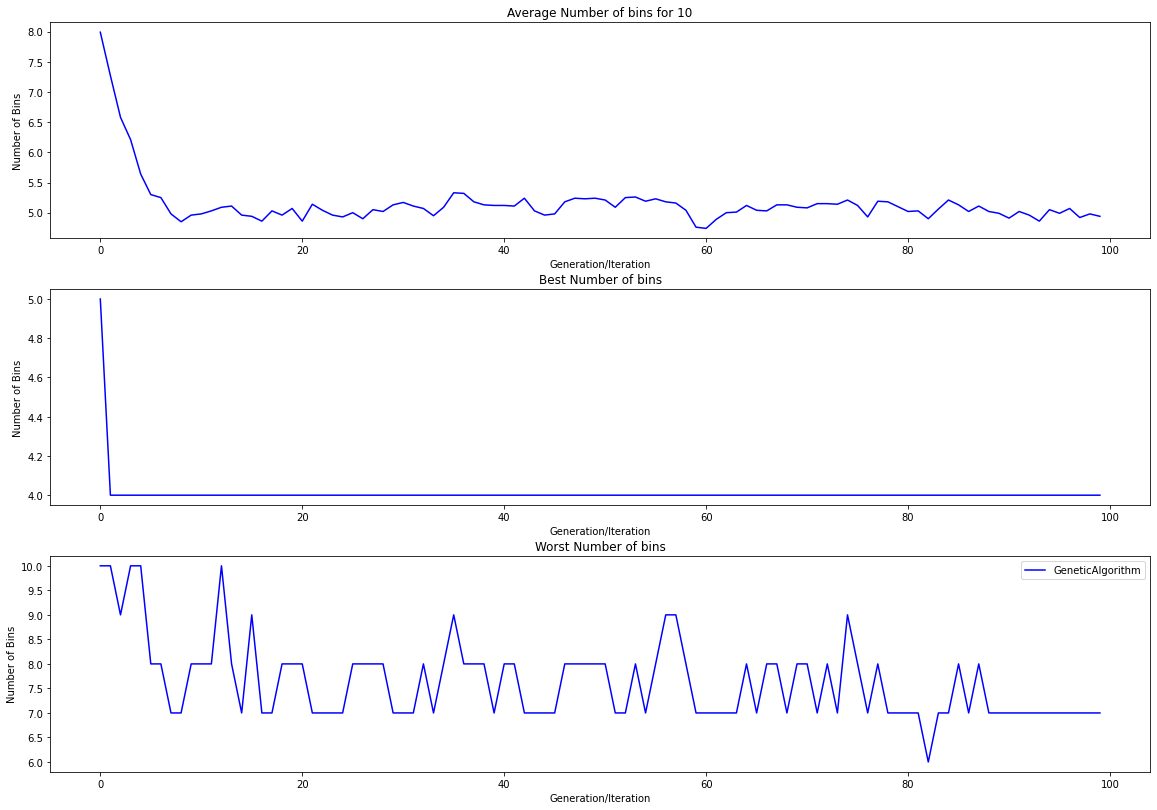

In [6]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(small_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 65
Runtime: 17.926154136657715
All time best 61


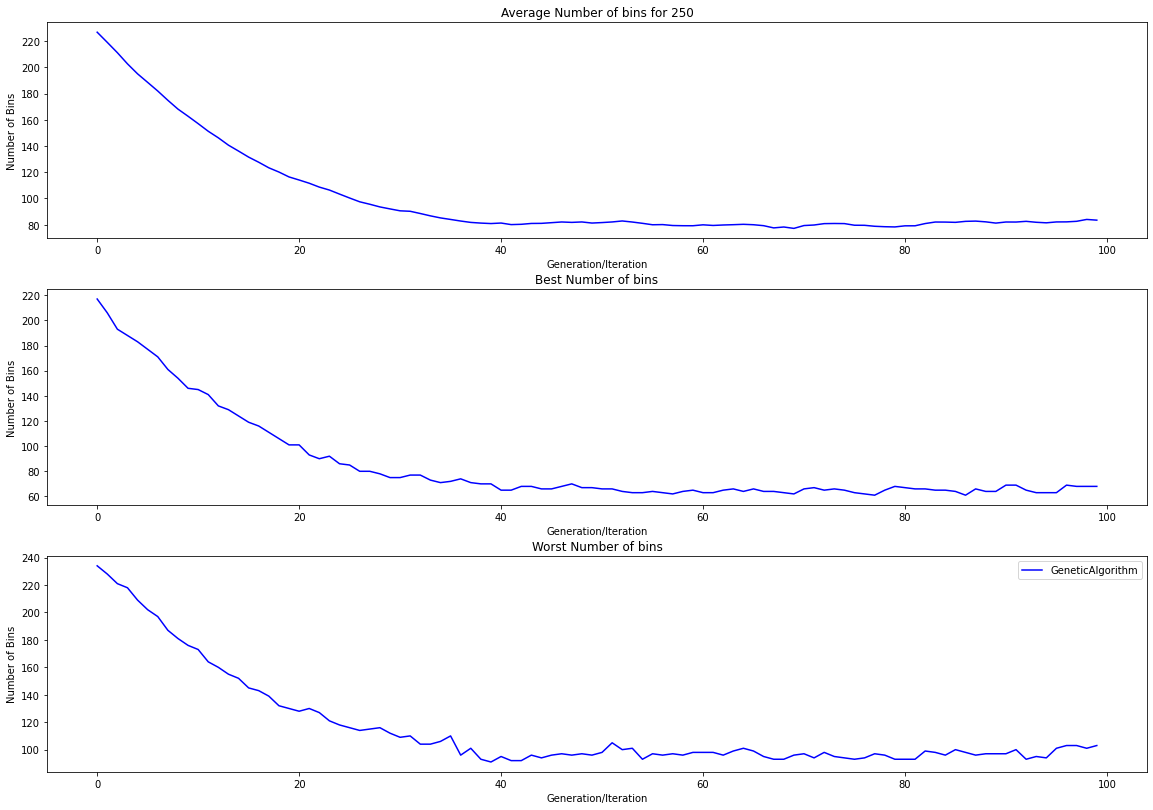

In [7]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(medium_objects, 100, medium_container[0], medium_container[1], 0.8, 0.05, number_generations,'amount_bins', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(medium_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 137
Runtime: 44.92375993728638
All time best 128


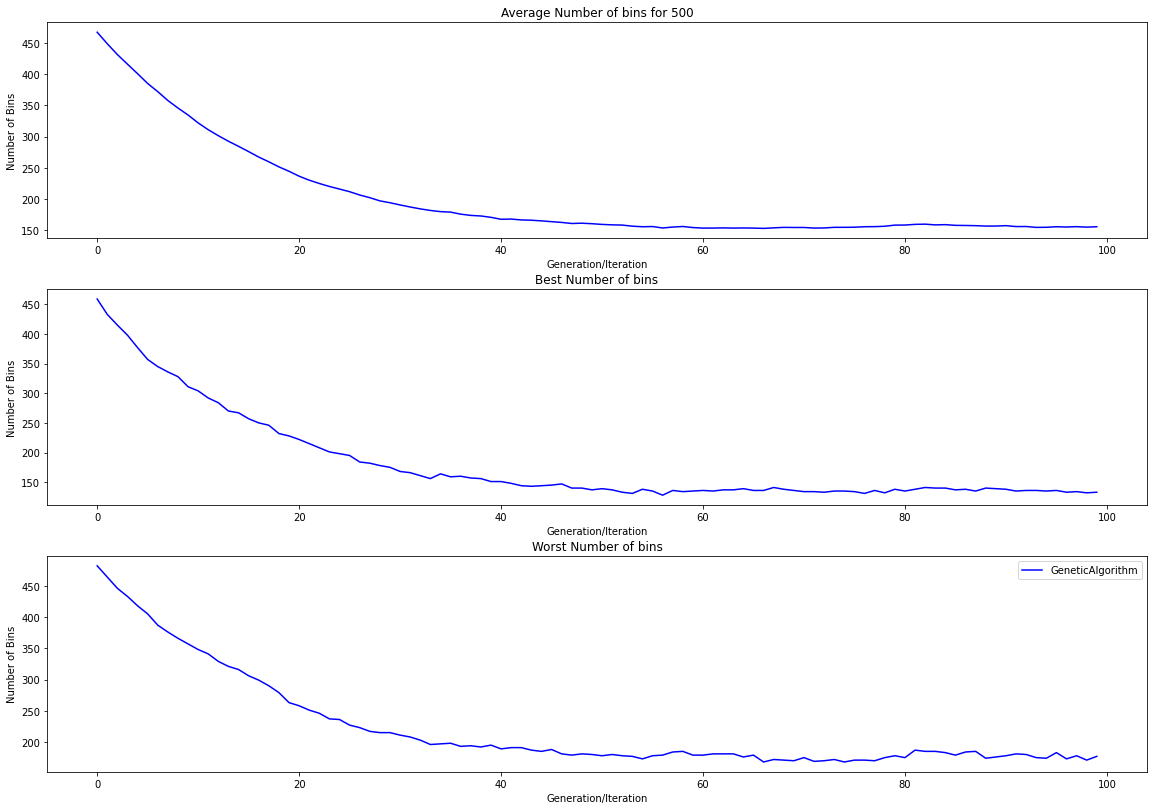

In [8]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(large_objects, 100, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(large_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## Random Fit mit 'fill' Fitness Funktion
Nutze die Fitness Funktion, die als Wert die Füllständer der einzelnen Bins nutzt.
$f = \frac{\sum_{i=1}^{N} \left(\frac{\text{fill}_{VOL_i}}{C_{VOL}}\right)^k + \left(\frac{\text{fill}_{WEIGHT_i}}{C_{WEIGHT}}\right)^k}{N}$


Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 3
Runtime: 1.0936439037322998
All time best 3


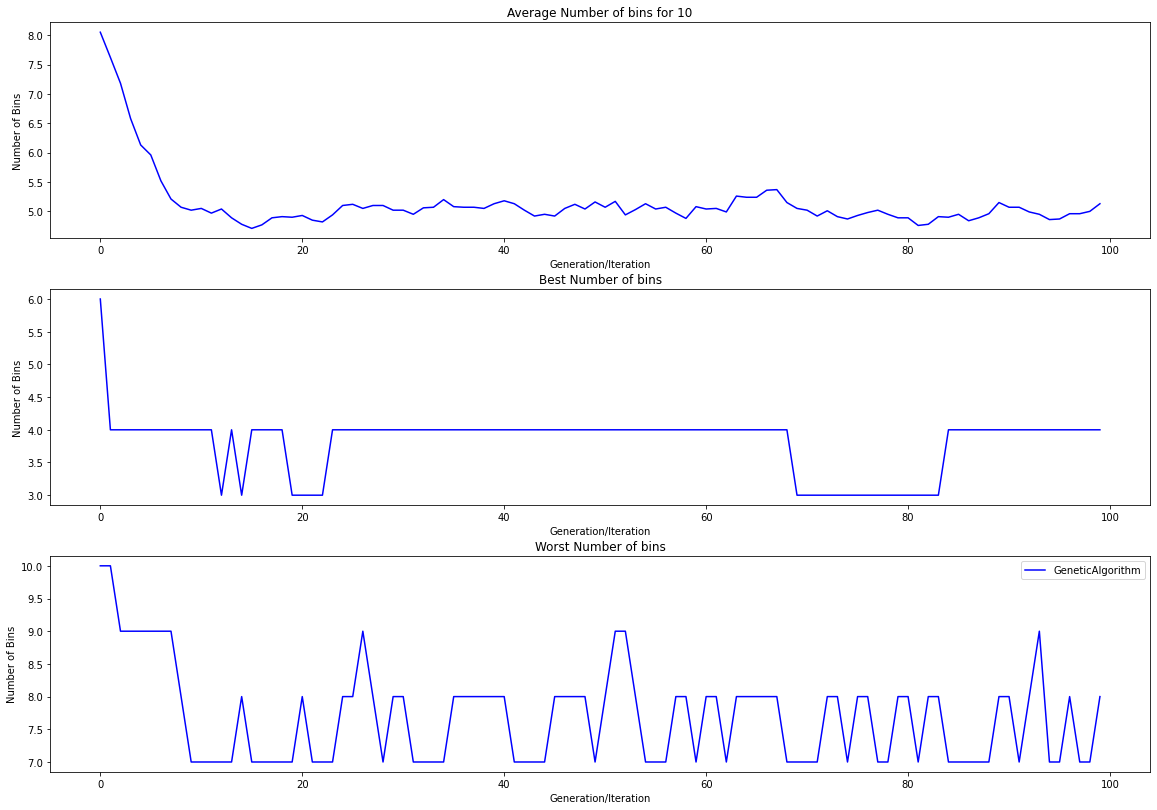

In [9]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(small_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 67
Runtime: 22.22554063796997
All time best 63


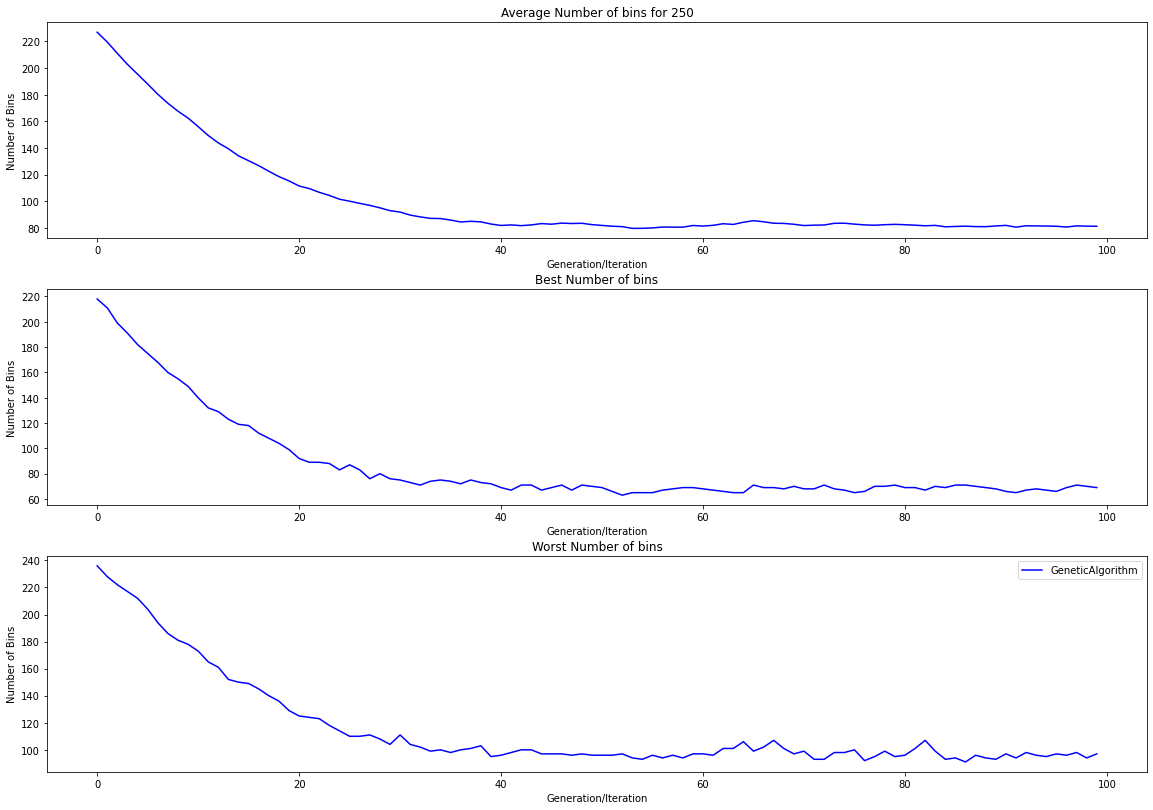

In [10]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(medium_objects, 100, medium_container[0], medium_container[1], 0.8, 0.05, number_generations,'fill', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(medium_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

Generation 0: Current all time best: 1000000
Generation 50: Current all time best: 136
Runtime: 44.70734786987305
All time best 129


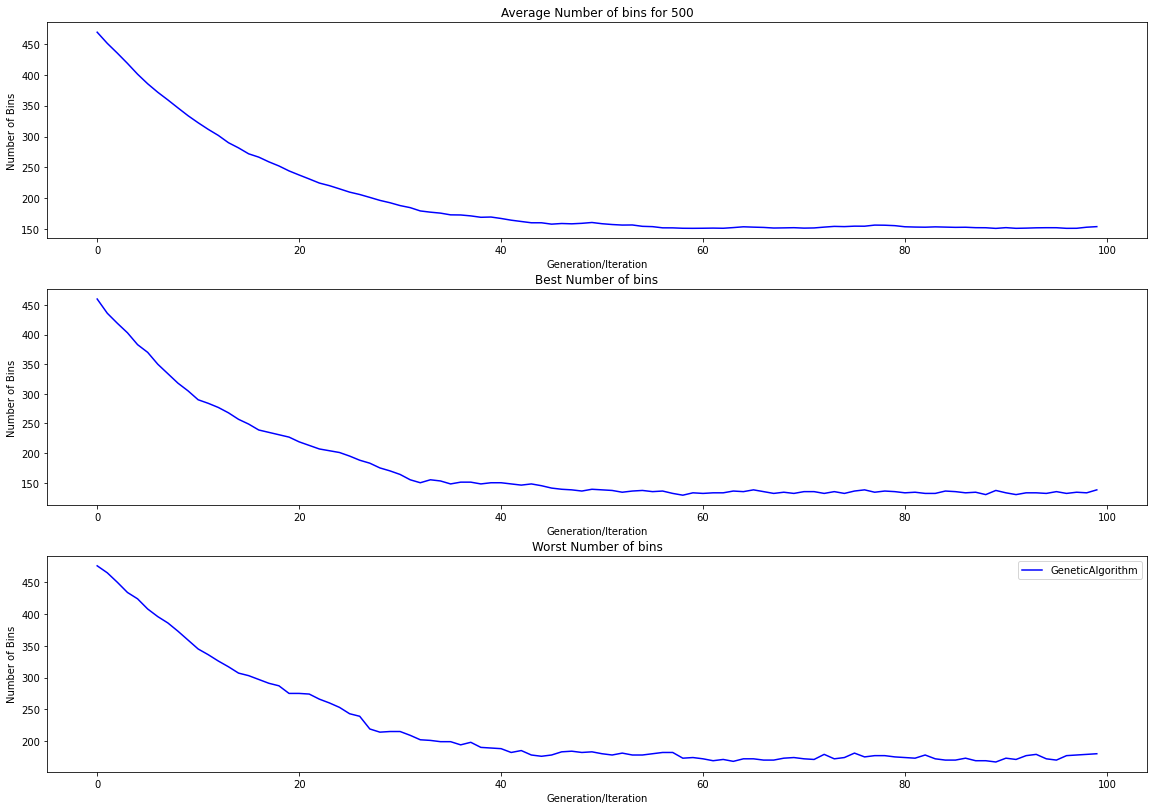

In [11]:
# Definiere GA
number_generations = 100 
GA = GeneticAlgorithm(large_objects, 100, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
# GA ausführen
solution, all_time_best, average_vals, best_vals, worst_vals, runtime = GA.run()
print(f'Runtime: {runtime}')
print(f'All time best {all_time_best}')
# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,11))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(large_objects)}')
ax[0].plot(x_vals, average_vals, color="blue", label = 'GeneticAlgorithm')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals, color="blue", label = 'GeneticAlgorithm')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals, color="blue", label = 'GeneticAlgorithm')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()